<p>Let us first start by importing the data. We will use the well-known data and we will apply the logistic regression. In this part we will only recognise one digit. Let us choose 1. Now let's start by importing our data and the necessary libraries.</p>

In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


<p>We normalize so that we only deal with numbers in the $(0,1)$ range</p>

In [3]:
X = X / 255

<p>Now as we are only considering whether an image is 9 or not, we will modify our labels. We are putting 1 if it is number 9, and 0 otherwise.</p>

In [4]:
y = np.where(y!=9,0,1)

<p>We define the number of training data and the test data.</p>

In [5]:
m_train = 65000
m_test = 5000

<p>We then divide our data accordingly. But there is one problem here. Since our data is arranged, meaning that the images containes 0's images for a few thousand, and then 1 etc. Therefore if we don't shuffle, then our test data will consist of only 9 images and we will not be training for 9 images enough. Therefore before we go any further, we need to make sure that we shuffle the data. We need to be careful as the indexing is really important here.</p>

In [6]:
train = X[0:m_train].T # We prefer column vectors that is why we take the transpose
test = X[m_train:].T

train_labels = y[0:m_train].reshape(1,m_train)
test_labels = y[m_train:].reshape(1,m_test)

In [7]:
rand = np.random.permutation(m_train)
train, train_labels = train[:,rand], train_labels[:,rand]

<p>Now we can see below that the data is indeed shuffled properly and the digit 9 has the label 1.</p>

[1]


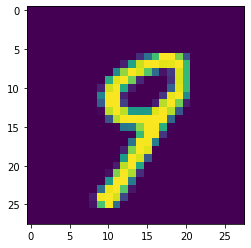

In [22]:
plt.imshow(train[:,8].reshape(28,28))
print(train_labels[:,8])

<p>Now we can use directly the code that I have added in my repository for logistic regression. For clarification I will add the code in this notebook too.</p>

<p>Here we have the activation function as sigmoid</p>

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<p>We have the cost function as follows.</p>

In [10]:
def cost_function(y, y_hat,m):
    J = -(1./m) * (np.sum(np.multiply(np.log(y_hat),y)) + np.sum(np.multiply(np.log(1-y_hat),(1-y))))
    return J

<p>We use the chain rule of calculus to calculate the algebraic expression for the derivative of the cost function.  $$ \frac{\partial J}{\partial \theta} = \frac{\partial J}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial \theta}$$</p>

In [11]:
alpha = 1 # parameter of the gradient descent, sometimes known as "learning parameter"

theta = np.random.randn(train.shape[0], 1) * 0.01
bias = np.zeros((1,1))

for i in range(1000):
    
    # Forward feed
    z = np.matmul(theta.T, train) + bias
    a = sigmoid(z)
    
    # Now we can compute the cost
    J = cost_function(train_labels,a,m_train)
    
    # With the idea of backpropagation, we compute the derivatives
    d_theta = (1/m_train) * np.matmul(train,(a-train_labels).T)
    d_bias = (1/m_train) * np.sum(a-train_labels, axis=1, keepdims=True)
    
    # We directly do the gradient descent 
    theta = theta - alpha * d_theta
    bias = bias - alpha * d_bias

    if (i % 200 == 0):
        print("Epoch: ", i, "cost: ", J)

print("Final cost:", J)

Epoch:  0 cost:  0.6987315047816619
Epoch:  200 cost:  0.10861957057737524
Epoch:  400 cost:  0.10224845226504042
Epoch:  600 cost:  0.09938965598632893
Epoch:  800 cost:  0.09772889961586252
Final cost: 0.09663720795832573


<p>Now with these values of $\theta$ and the bias, we apply one more forward propagation to have the outputs.</p>

In [12]:
z = np.matmul(theta.T, test) + bias
a = sigmoid(z)

predictions = (a>0.5)[0,:]
labels = (test_labels == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[3919  228]
 [  72  781]]


<p>We can see that we have been correct most of the time. Let us use sklearn utilities one more time for a better result analysis.</p>

In [13]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       0.98      0.95      0.96      4147
        True       0.77      0.92      0.84       853

    accuracy                           0.94      5000
   macro avg       0.88      0.93      0.90      5000
weighted avg       0.95      0.94      0.94      5000



<p>This is a working model that will recognise only one digit with using one neuron i.e. logistic regression.</p>